In [54]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline
import IPython.display
import librosa
import librosa.display
#https://musicinformationretrieval.com/ipython_audio.html

In [55]:
x, sr = librosa.load('test1.wav', sr = 44100, mono = 'True')
x = x[:7*sr]

In [56]:
# initialising STFT params
N = 2 ** 15 #FFT size
M = N     #window size
H = N/16  #hop size
W = 'hann'

stft = librosa.stft(y = x, n_fft = N, hop_length = H, win_length = M, window = W, center = 'False')

In [57]:
onset_frames = librosa.onset.onset_detect(y=x, sr=sr)
onsets = librosa.frames_to_time(onset_frames, sr=sr)
print (np.shape(onsets))

(14,)


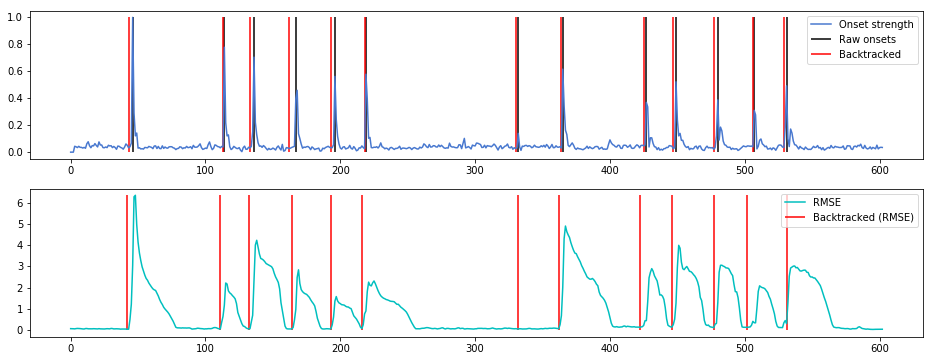

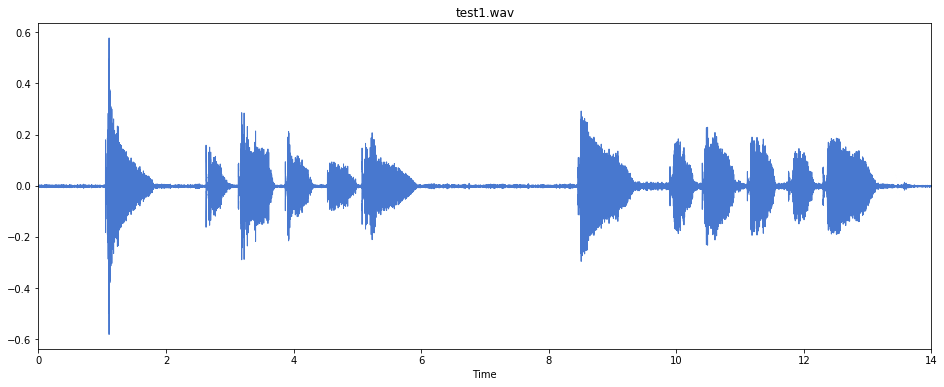

In [58]:
oenv = librosa.onset.onset_strength(y=x, sr=sr)
# Detect events without backtracking
onset_raw = librosa.onset.onset_detect(onset_envelope=oenv,backtrack=False)
# Backtrack the events using the onset envelope
onset_bt = librosa.onset.onset_backtrack(onset_raw, oenv)
# Backtrack the events using the RMS energy
rmse = librosa.feature.rmse(S=np.abs(librosa.stft(y=x)))
onset_bt_rmse = librosa.onset.onset_backtrack(onset_raw, rmse[0])
# Plot the results

plt.figure(figsize=(16,6))
plt.subplot(2,1,1)
plt.plot(oenv, label='Onset strength')
plt.vlines(onset_raw, 0, oenv.max(), label='Raw onsets')
plt.vlines(onset_bt, 0, oenv.max(), label='Backtracked', color='r')
plt.legend(frameon=True, framealpha=0.75)
plt.subplot(2,1,2)
plt.plot(rmse[0],'c', label='RMSE')
plt.vlines(onset_bt_rmse, 0, rmse.max(), label='Backtracked (RMSE)', color='r')
plt.legend(frameon=True, framealpha=0.75)

plt.figure(figsize=(16,6))
librosa.display.waveplot(x)
plt.title(track)
plt.show()

In [59]:
print (onset_raw)

[ 46 114 136 167 196 219 332 365 427 449 480 507 531]


(84, 603)
(308700,)


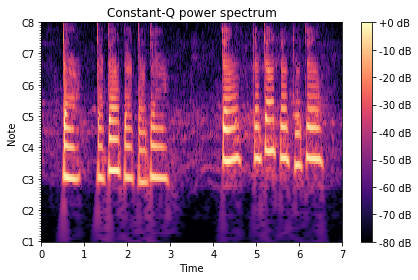

In [63]:
C = np.abs(librosa.cqt(x, sr=sr))
print (np.shape(C))
print (np.shape(x))

librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()

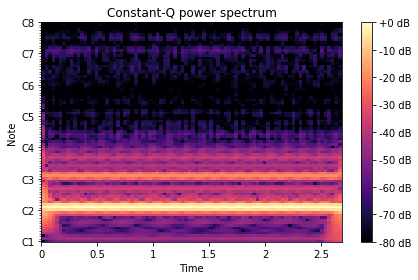

In [102]:
x50, sr = librosa.load('o25.wav', sr = 16000, mono = 'True')
x70, sr = librosa.load('o84.wav', sr = 16000, mono = 'True')
C50 = np.abs(librosa.cqt(x50[:int(2.68*sr)], sr=sr, n_bins=84))
C70 = np.abs(librosa.cqt(x70[:int(2.68*sr)], sr=sr))
librosa.display.specshow(librosa.amplitude_to_db(C50, ref=np.max),sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()

(84, 84)


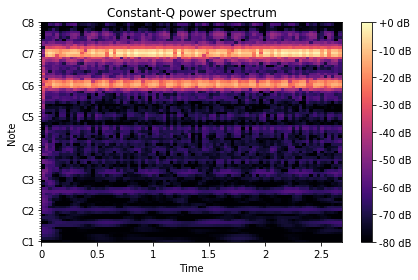

In [103]:
librosa.display.specshow(librosa.amplitude_to_db(C70, ref=np.max),sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()

print (np.shape(C50))